In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import missingno as msno
import requests
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
from shapely.geometry import Point

In [3]:
arr = geopandas.read_file('datasets/arrests_2010-2019.geojson')
print(arr.shape)
arr.head(3).T

(1318599, 25)


,0,1,2
area,18,12,08
rd,1841,1215,0882
location,11000 S FIGUEROA ST,1000 W 52ND ST,SAWTELLE
bkg_time,0542,0213,2002
area_desc,Southeast,77th Street,West LA
descent_cd,B,B,W
arst_date,2013-02-01T00:00:00,2013-01-17T00:00:00,2013-02-19T00:00:00
chrg_grp_cd,13,16,16
dispo_desc,MISDEMEANOR COMPLAINT FILED,FELONY COMPLAINT FILED,FELONY COMPLAINT FILED
grp_description,Prostitution/Allied,Narcotic Drug Laws,Narcotic Drug Laws


In [5]:
arr['chrg_desc'].value_counts()[:20]

DRUNK DRIVING ALCOHOL/DRUGS                  98452
DRINKING IN PUBLIC                           93778
CORPORAL INJURY ON SPOUSE/COHABITANT/ETC     46721
POSSESSION CONTROLLED SUBSTANCE              45127
FTA AFTER WRITTEN PROMISE                    31624
POSSESSION NARCOTIC CONTROLLED SUBSTANCE     29340
PROSTITUTION                                 26812
OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE      26056
SIT/LIE/SLEEP SIDEWALK OR STREET             25730
LOS ANGELES MUNICIPAL CODE                   24738
GRAND THEFT (OVER $400)                      23455
BURGLARY                                     22395
ROBBERY                                      22085
ADW, NOT FIREARM, W/GBI                      21948
BATTERY ON PERSON                            18625
BATT EX-SPOUSE/FIANCEE/PERSN W/DATING REL    18262
VIOLATION OF PAROLE:FELONY                   16548
TAKE VEHICLE W/O OWNER'S CONSENT             15513
SHOPLIFTING                                  13067
CURFEW - JUV ONLY              

### Maps

In [5]:
gdf = geopandas.read_file('../covid_la/datasets/gis_data/la-county-neighborhoods-current/l.a. county neighborhood (current).shp')
gdf.rename(columns={'name':'place'},inplace=True)
print(gdf.shape)
gdf.head(3)

(272, 11)


,slug,set,kind,external_i,place,display_na,sqmi,type,name_1,slug_1,geometry
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,"POLYGON ((-118.20262 34.53899, -118.18947 34.5..."
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,None,None,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,None,None,"POLYGON ((-118.76193 34.16820, -118.72632 34.1..."


#### Loop through neighborhoods and dummy out by point within polygons (TAKES A WHILE)

In [6]:
arr_loc = []

for i in range(gdf.shape[0]):
    dummy = [1 if arr['geometry'][j].within(gdf['geometry'][i]) else 0 for j in range(arr.shape[0])]
    arr_loc.append(sum(dummy))

gdf['arrest_totals'] = arr_loc

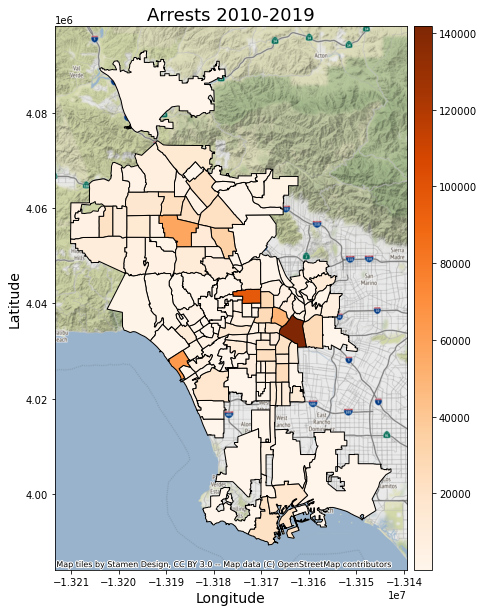

In [15]:
gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(16,10))
plt.title('Arrests 2010-2019',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf[gdf['arrest_totals']>100].plot(column='arrest_totals',ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax)
#plt.savefig('images/arrest_map_2010-2019.png',dpi=235,bbox_inches='tight');

In [16]:
gdf.sort_values('arrest_totals',ascending=False)

,slug,set,kind,external_i,place,display_na,sqmi,type,name_1,slug_1,geometry,arrest_totals
60,downtown,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),downtown,Downtown,Downtown L.A. County Neighborhood (Current),5.83816978008,segment-of-a-city,None,None,"POLYGON ((-13162439.614 4036687.859, -13162361...",141768
106,hollywood,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),hollywood,Hollywood,Hollywood L.A. County Neighborhood (Current),3.50639022096,segment-of-a-city,None,None,"POLYGON ((-13172091.467 4042937.480, -13171779...",97451
238,venice,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),venice,Venice,Venice L.A. County Neighborhood (Current),3.17076584054,segment-of-a-city,None,None,"MULTIPOLYGON (((-13185995.558 4024037.667, -13...",64694
237,van-nuys,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),van-nuys,Van Nuys,Van Nuys L.A. County Neighborhood (Current),8.99090891865,segment-of-a-city,None,None,"POLYGON ((-13188357.669 4058530.022, -13187754...",57287
257,westlake,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),westlake,Westlake,Westlake L.A. County Neighborhood (Current),2.71730553526,segment-of-a-city,None,None,"POLYGON ((-13166903.687 4039133.558, -13166456...",50179
...,...,...,...,...,...,...,...,...,...,...,...,...
68,east-san-gabriel,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),east-san-gabriel,East San Gabriel,East San Gabriel L.A. County Neighborhood (Cur...,2.18274231728,unincorporated-area,None,None,"MULTIPOLYGON (((-13144656.043 4042165.369, -13...",0
67,east-pasadena,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),east-pasadena,East Pasadena,East Pasadena L.A. County Neighborhood (Current),1.30792712424,unincorporated-area,None,None,"POLYGON ((-13143244.058 4048681.663, -13143210...",0
65,east-la-mirada,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),east-la-mirada,East La Mirada,East La Mirada L.A. County Neighborhood (Current),1.11006524514,unincorporated-area,None,None,"POLYGON ((-13134131.156 4019373.296, -13134079...",0
233,valinda,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),valinda,Valinda,Valinda L.A. County Neighborhood (Current),2.00667989076,unincorporated-area,None,None,"POLYGON ((-13128955.770 4035804.642, -13128959...",0


In [14]:
gdf.to_file('datasets/arrest_map.shp')